In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

In [3]:
image_paths = [
    "cropped/Black_corals/Antipatharia/83baa0a1-aa5a-4249-b67e-a4e306676711-0.jpg",
    "cropped/Black_corals/Antipatharia/Schizopathidae/4b7f7f50-3819-4520-9842-04d81ad3093a-0.png"
]

images = [cv.imread(path) for path in image_paths]

In [23]:
#img = images[2]
#mask = np.zeros(img.shape[:2], np.uint8)
img = io.imread("http://127.0.0.1:5000/image/4")
mask_img = np.array(io.imread("http://127.0.0.1:5000/gc/get_mask/4"))
mask = np.where(mask_img != 0, cv.GC_FGD, cv.GC_BGD).astype(np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
bgdMargin = 4

#rect = (bgdMargin, bgdMargin, img.shape[1]-bgdMargin, img.shape[0]-bgdMargin)
rect = (0, 0, img.shape[1], img.shape[0])

In [34]:
new_mask, new_bg_model, new_fg_model = cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_MASK)

In [36]:
new_bg_model

array([[1.82986698e-01, 1.08046932e-01, 2.45069096e-01, 2.65939240e-01,
        1.97958034e-01, 1.13394049e+02, 1.39501352e+02, 1.32305301e+02,
        3.49546324e+01, 5.35486825e+01, 6.24554697e+01, 7.72816074e+01,
        1.02304253e+02, 1.04467206e+02, 9.24533678e+01, 1.19150303e+02,
        1.18663244e+02, 6.13869485e+01, 8.46120723e+01, 8.97901810e+01,
        2.55733770e+02, 2.67137680e+02, 2.46695047e+02, 2.67137680e+02,
        3.29877551e+02, 2.97493327e+02, 2.46695047e+02, 2.97493327e+02,
        3.05254226e+02, 1.27686520e+02, 1.51479542e+02, 1.43181663e+02,
        1.51479542e+02, 1.89133109e+02, 1.75460799e+02, 1.43181663e+02,
        1.75460799e+02, 1.72774964e+02, 2.24662683e+01, 1.97558650e+01,
        1.10633115e+01, 1.97558650e+01, 2.96137535e+01, 1.88446445e+01,
        1.10633115e+01, 1.88446445e+01, 3.29163898e+01, 2.81491320e+01,
        2.69076699e+01, 1.76273483e+01, 2.69076699e+01, 3.63944262e+01,
        2.24183694e+01, 1.76273483e+01, 2.24183694e+01, 3.228655

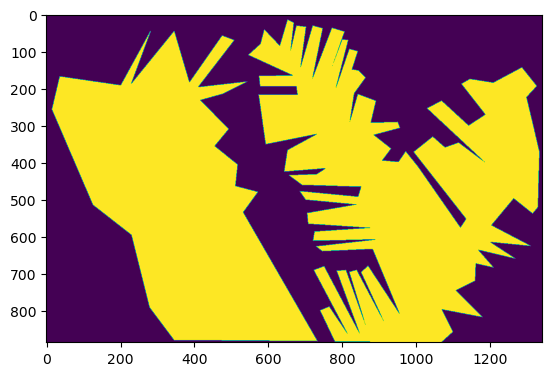

In [33]:
mask2 = np.where((new_mask==cv.GC_BGD) | (new_mask==cv.GC_PR_BGD), 0, 1).astype(np.uint8)
img_masked = img * mask2[:, :, np.newaxis]
plt.imshow(mask2)